In [1]:
import k
from mp_api.client import MPRester
API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"
try:


    with MPRester(API_KEY) as mpr:
        # Query for Li-based cathode materials with high energy density
        docs = mpr.materials.insertion_electrodes.search(
            working_ion="Li",
            fields=[
                "battery_id", "formula_discharge", "average_voltage"
                , "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "stability_charge", "fracA_charge", "stability_charge", "max_delta_volume", "stability_discharge", "fracA_discharge"
            ]
        )

        # Convert to pandas for research analysis
        import pandas as pd
        df = pd.DataFrame([doc.dict() for doc in docs])
        print(df)

except Exception as e:
    print(f"An error occurred: {e}")


import pandas as pd

df = pd.DataFrame([doc.dict() for doc in docs])

df.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving InsertionElectrodeDoc documents: 100%|██████████| 2774/2774 [00:00<00:00, 4800.47it/s] 


         battery_id formula_discharge  max_delta_volume  average_voltage  \
0          mp-28_Li             Li3Ce          2.951183        -0.444846   
1        mp-2074_Li             Li3Sb          1.569237         1.015953   
2      mp-568806_Li              LiC6          0.025414         0.084405   
3      mp-573471_Li           Li22Sn5          0.009450        -0.362516   
4       mp-22902_Li              LiBi          0.368255         0.796796   
...             ...               ...               ...              ...   
2769   mp-801332_Li    Li3VCrP2(HO5)2          0.076598        -0.048828   
2770   mp-806951_Li     LiVFeP2(O4F)2          0.017783         0.617592   
2771   mp-802114_Li     LiMnVP2(HO5)2          0.045934        -2.235023   
2772   mp-801251_Li     LiVCrP2(O4F)2          0.017284        -1.876176   
2773  mp-1227445_Li   BaSrLiNdTlCu2O7          0.071513         0.911354   

      capacity_grav  capacity_vol  energy_grav   energy_vol  fracA_charge  \
0        4

,battery_id,formula_discharge,max_delta_volume,average_voltage,capacity_grav,capacity_vol,energy_grav,energy_vol,fracA_charge,fracA_discharge,stability_charge,stability_discharge,fields_not_requested
0,mp-28_Li,Li3Ce,2.951183,-0.444846,499.595769,1295.168213,-222.242937,-576.149771,0.000000,0.750000,0.000000,0.333634,"[builder_meta, battery_type, thermo_type, batt..."
1,mp-2074_Li,Li3Sb,1.569237,1.015953,563.913254,1890.293779,572.909146,1920.448911,0.000000,0.750000,0.328351,0.000000,"[builder_meta, battery_type, thermo_type, batt..."
2,mp-568806_Li,LiC6,0.025414,0.084405,339.236925,734.096706,28.633212,61.961259,0.000000,0.142857,0.011936,0.002406,"[builder_meta, battery_type, thermo_type, batt..."
3,mp-573471_Li,Li22Sn5,0.009450,-0.362516,26.936090,69.584747,-9.764758,-25.225570,0.809524,0.814815,0.000000,0.010070,"[builder_meta, battery_type, thermo_type, batt..."
4,mp-22902_Li,LiBi,0.368255,0.796796,124.126099,923.538664,98.903144,735.871648,0.000000,0.500000,0.049545,0.000000,"[builder_meta, battery_type, thermo_type, batt..."


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering (update with your actual column names)
features = ['capacity_grav', 'average_voltage', "average_voltage", "energy_grav", "stability_charge", "fracA_charge", "max_delta_volume", "stability_discharge", "fracA_discharge"]
# Step 1:
X_custom = df[features].values
# Scale the data (crucial for KMeans/DBSCAN)
X = StandardScaler().fit_transform(X_custom)

print("Data ready for clustering.")

Data ready for clustering.


In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Assume X is your data (scaled features are recommended)
# X = ...

# Define parameter ranges to test (example values)
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [3, 5, 10]

best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Filter out noise points (labeled as -1)
        # Silhouette score requires at least 2 clusters (n_labels >= 2)
        if len(set(labels)) > 1:
            score = silhouette_score(X[labels != -1], labels[labels != -1])
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Optimal parameters: {best_params}")
print(f"Highest Silhouette Score: {best_score}")


Optimal parameters: {'eps': 0.1, 'min_samples': 10}
Highest Silhouette Score: 0.9299747418133129


In [ ]:
from kneed import KneeLocator
import numpy as np

# 1. Reuse the sorted distances from the previous step
# distances[:, k-1] was used to find the kth neighbor distance
k_distances = np.sort(distances[:, k-1])
i = np.arange(len(k_distances))

# 2. Use KneeLocator to find the elbow point
# curve='convex' and direction='increasing' match the k-distance plot shape
kneedle = KneeLocator(i, k_distances, S=1.0, curve='convex', direction='increasing')

# 3. Extract the exact Y value (optimal eps)
optimal_eps = kneedle.knee_y

print(f"Optimal Epsilon (eps): {optimal_eps:.4f}")

# 4. Optional: Visualize the automatically detected point
kneedle.plot_knee()
plt.show()


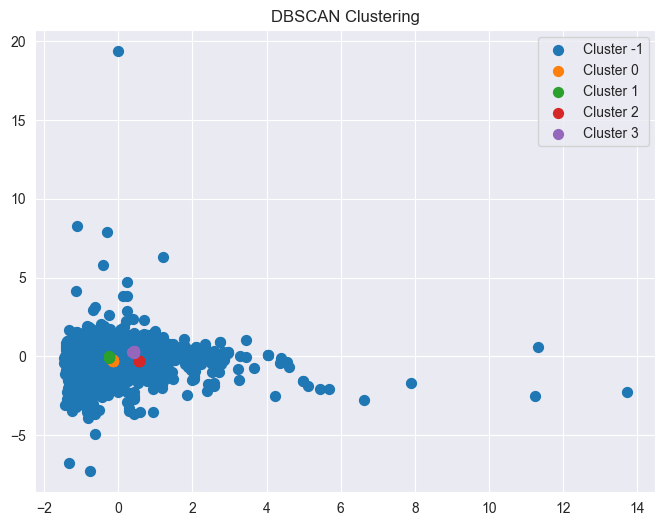

Number of clusters = 5
Silhouette Score for DBSCAN: 0.93


In [14]:
# Step 6: DBSCAN Clustering
dbscan = DBSCAN(eps=0.1, min_samples=10)
labels_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels_dbscan)
for label in unique_labels:
    cluster = X[labels_dbscan == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {label}', s=50)
plt.title("DBSCAN Clustering")
plt.legend()
plt.grid(True)
plt.show()
print(f"Number of clusters = {len(unique_labels)}")

# Step 7: Silhouette Score for DBSCAN (exclude noise points -1)
valid_labels = labels_dbscan[labels_dbscan != -1]
if len(set(valid_labels)) > 1:
    sil_score_dbscan = silhouette_score(X[labels_dbscan != -1], valid_labels)
    print(f"Silhouette Score for DBSCAN: {sil_score_dbscan:.2f}")
else:
    print("Not enough clusters to calculate Silhouette Score for DBSCAN.")